In [11]:
from matplotlib import pyplot as plt
import numpy as np
from cl2pd import madx
from cpymad.madx import Madx
import pandas as pd

# Tutorial 4

## First part

### Periodic solution

In [12]:
myMad = Madx()
myString='''
quadrupoleLenght=0.1;
cellLength=10;

myK1=.1;// m^-2
myK2=.1;// m^-2
myK3=.1;// m^-2
myK4=.1;// m^-2

Q: quadrupole, L=quadrupoleLenght;

myCell:sequence, refer=center, L=cellLength;
myStart: marker, at=0;
q1: Q,K1:=myK1, at=2;
q2: Q,K1:=myK2, at=4;
q3: Q,K1:=myK3, at=6;
q4: Q,K1:=myK4, at=8;
myEnd: marker, at=10;
endsequence;

beam, particle=proton, energy=2;

use, sequence=myCell;
twiss,file="./firstpart/PeriodicSolution.txt";
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="PeriodicSolution";
'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.04.02  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2018.10.03               +
  + Execution date: 2020.01.20 18:29:18      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCPIN:  Mode 2 is unstable for delta(p)/p =     0.000000: cosmux =     0.805975, cosmuy =     1.206091                                                        
++++++ warning: Twiss failed:  MAD-X continues
Plot - default table plotted: twiss
++++++ warning: double_from_table_row: row out of range: twiss->s[1>=1<=0]
++++++ warning: PLOT:  table twiss                                            is empty                                                         

 GXPLOT-X11  1.50 initialized

 plot number =            1


**Conclusions**: the periodic solution does not exist.

### IC solution

In [13]:
myString='''
twiss,betx=1, bety=2, file="./firstpart/ICSolution.txt";
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="ICSolution";
'''
myMad.input(myString);

enter Twiss module
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
       0.236117848                  0        85.59952509                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2150800354 

               dq2            betymax              dymax              dyrms 
                 0        61.41336649                  0                  0 

            ycomax             ycorms             deltap            synch_1 


In [14]:
myDF1=madx.tfs2pd('./firstpart/ICSolution.txt')
myDF1
myDFTable1=myDF1.iloc[0].TABLE
myDFTable1

NAME     KEYWORD      S       BETX      ALFX       MUX       BETY  \
0   MYCELL$START      MARKER   0.00   1.000000  0.000000  0.000000   2.000000   
1        MYSTART      MARKER   0.00   1.000000  0.000000  0.000000   2.000000   
2        DRIFT_0       DRIFT   1.95   4.802500 -1.950000  0.174584   3.901250   
3             Q1  QUADRUPOLE   2.05   5.197436 -1.998042  0.177770   4.105284   
4        DRIFT_1       DRIFT   3.95  16.257422 -3.823004  0.210905  10.034826   
5             Q2  QUADRUPOLE   4.05  17.014863 -3.748881  0.211862  10.461302   
6        DRIFT_2       DRIFT   5.95  34.454604 -5.429930  0.224364  20.897199   
7             Q3  QUADRUPOLE   6.05  35.514267 -5.163174  0.224819  21.580410   
8        DRIFT_3       DRIFT   7.95  57.945783 -6.642887  0.231487  37.361845   
9             Q4  QUADRUPOLE   8.05  59.223333 -6.128361  0.231758  38.356732   
10       DRIFT_4       DRIFT  10.00  85.599525 -7.397891  0.236118  61.413366   
11         MYEND      MARKER  10.00  85.599525 -7.397891  0.236118  61.413366   
12    MYCELL$END      MARKER  10.00  85.599525 -7.397891  0.236118  61.413366   

        ALFY       MUY    X ...   SIG54  SIG55  SIG56  SIG61  SIG62  SIG63  \
0   0.000000  0.000000  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
1   0.000000  0.000000  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
2  -0.975000  0.122985  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
3  -1.066023  0.126963  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
4  -2.054789  0.174794  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
5  -2.211390  0.176348  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
6  -3.281187  0.196856  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
7  -3.553206  0.197606  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
8  -4.752813  0.208263  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
9  -5.199368  0.208684  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
10 -6.624547  0.215080  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
11 -6.624547  0.215080  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   
12 -6.624547  0.215080  0.0 ...     0.0    0.0    0.0    0.0    0.0    0.0   

    SIG64  SIG65  SIG66   N1  
0     0.0    0.0    0.0  0.0  
1     0.0    0.0    0.0  0.0  
2     0.0    0.0    0.0  0.0  
3     0.0    0.0    0.0  0.0  
4     0.0    0.0    0.0  0.0  
5     0.0    0.0    0.0  0.0  
6     0.0    0.0    0.0  0.0  
7     0.0    0.0    0.0  0.0  
8     0.0    0.0    0.0  0.0  
9     0.0    0.0    0.0  0.0  
10    0.0    0.0    0.0  0.0  
11    0.0    0.0    0.0  0.0  
12    0.0    0.0    0.0  0.0  

[13 rows x 256 columns]

In [15]:
# These are the gradients
aux=myDFTable1[myDFTable1['KEYWORD']=='QUADRUPOLE']
aux['K1L']/aux['L']

3    0.1
5    0.1
7    0.1
9    0.1
dtype: float64

Text(0,0.5,'[m]')

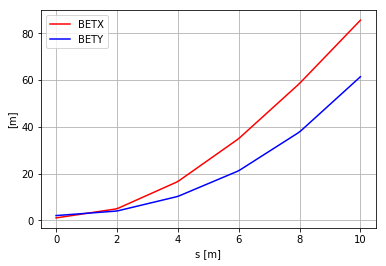

In [16]:
aux=myDFTable1
plt.plot(aux['S'],aux['BETX'],'r')
plt.plot(aux['S'],aux['BETY'],'b')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

## Second part
### First Matching 

In [17]:
myString='''
savebeta, label=betaEnd, place=#e;

MATCH, SEQUENCE=myCell, betx=1, bety=2;
constraint, betx=2, range=#e;
constraint, alfx=0, range=#e;
constraint, bety=1, range=#e;
constraint, alfy=0, range=#e;
VARY, NAME= myK1, STEP=0.00001;
VARY, NAME= myK2, STEP=0.00001;
VARY, NAME= myK3, STEP=0.00001;
VARY, NAME= myK4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;

twiss,betx=1, bety=2, file="./firstpart/AfterMatching1.txt";
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching1";
'''
myMad.input(myString);

START MATCHING

number of sequences: 1
sequence name: mycell
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.2049999680949818E+05


 Solve system with            4 con,           4 var
 Rank             4   Condition number    806.96395556706091     
 Step length    1.0002004021648470     
 Bisec iteration            1
call:     2 Dx =   0.20007935E+01  Penalty function =  0.2048145741077847E+13
 Solve system with            4 con,           4 var
 Rank             4   Condition number    1925.5919808062456     
 Step length   0.30373559964724089     
call:     3 Dx =   0.30373560E+00  Penalty function =  0.2055611720727117E+12
 Solve system with            4 con,           4 var
 Rank             4   Condition number    1085.8651600877479     
 Step length 

In [18]:
myDF2=madx.tfs2pd('./firstpart/AfterMatching1.txt')
myDF2
myDFTable2=myDF2.iloc[0].TABLE
myDFTable2

NAME     KEYWORD      S       BETX          ALFX       MUX  \
0   MYCELL$START      MARKER   0.00   1.000000  0.000000e+00  0.000000   
1        MYSTART      MARKER   0.00   1.000000  0.000000e+00  0.000000   
2        DRIFT_0       DRIFT   1.95   4.802500 -1.950000e+00  0.174584   
3             Q1  QUADRUPOLE   2.05   5.236870 -2.403497e+00  0.177762   
4        DRIFT_1       DRIFT   3.95  19.041695 -4.862201e+00  0.208229   
5             Q2  QUADRUPOLE   4.05  18.765565  7.562999e+00  0.209062   
6        DRIFT_2       DRIFT   5.95   1.222113  1.670396e+00  0.273993   
7             Q3  QUADRUPOLE   6.05   0.989436  7.088986e-01  0.288652   
8        DRIFT_3       DRIFT   7.95   3.777696 -2.176404e+00  0.568250   
9             Q4  QUADRUPOLE   8.05   3.901250  9.750000e-01  0.572339   
10       DRIFT_4       DRIFT  10.00   2.000000  4.547610e-14  0.695325   
11         MYEND      MARKER  10.00   2.000000  4.547610e-14  0.695325   
12    MYCELL$END      MARKER  10.00   2.000000  4.547610e-14  0.695325   

         BETY          ALFY       MUY    X ...   SIG54  SIG55  SIG56  SIG61  \
0    2.000000  0.000000e+00  0.000000  0.0 ...     0.0    0.0    0.0    0.0   
1    2.000000  0.000000e+00  0.000000  0.0 ...     0.0    0.0    0.0    0.0   
2    3.901250 -9.750000e-01  0.122985  0.0 ...     0.0    0.0    0.0    0.0   
3    4.074009 -7.486915e-01  0.126974  0.0 ...     0.0    0.0    0.0    0.0   
4    8.301838 -1.476482e+00  0.179943  0.0 ...     0.0    0.0    0.0    0.0   
5    9.169430 -7.387900e+00  0.181787  0.0 ...     0.0    0.0    0.0    0.0   
6   59.125686 -1.890487e+01  0.194788  0.0 ...     0.0    0.0    0.0    0.0   
7   58.865109  2.145128e+01  0.195055  0.0 ...     0.0    0.0    0.0    0.0   
8    5.631485  6.566417e+00  0.211694  0.0 ...     0.0    0.0    0.0    0.0   
9    4.802500  1.950000e+00  0.214797  0.0 ...     0.0    0.0    0.0    0.0   
10   1.000000  1.699606e-13  0.389381  0.0 ...     0.0    0.0    0.0    0.0   
11   1.000000  1.699606e-13  0.389381  0.0 ...     0.0    0.0    0.0    0.0   
12   1.000000  1.699606e-13  0.389381  0.0 ...     0.0    0.0    0.0    0.0   

    SIG62  SIG63  SIG64  SIG65  SIG66   N1  
0     0.0    0.0    0.0    0.0    0.0  0.0  
1     0.0    0.0    0.0    0.0    0.0  0.0  
2     0.0    0.0    0.0    0.0    0.0  0.0  
3     0.0    0.0    0.0    0.0    0.0  0.0  
4     0.0    0.0    0.0    0.0    0.0  0.0  
5     0.0    0.0    0.0    0.0    0.0  0.0  
6     0.0    0.0    0.0    0.0    0.0  0.0  
7     0.0    0.0    0.0    0.0    0.0  0.0  
8     0.0    0.0    0.0    0.0    0.0  0.0  
9     0.0    0.0    0.0    0.0    0.0  0.0  
10    0.0    0.0    0.0    0.0    0.0  0.0  
11    0.0    0.0    0.0    0.0    0.0  0.0  
12    0.0    0.0    0.0    0.0    0.0  0.0  

[13 rows x 256 columns]

In [19]:
# These are the gradients
aux=myDFTable2[myDFTable2['KEYWORD']=='QUADRUPOLE']
aux['K1L']/aux['L']

3   -0.676969
5    6.545144
7   -6.802510
9    8.243978
dtype: float64

Text(0,0.5,'[m]')

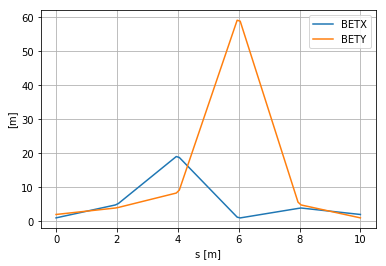

In [20]:
aux=myDFTable2
plt.plot(aux['S'],aux['BETX'])
plt.plot(aux['S'],aux['BETY'])
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

### Second matching 

In [21]:
myString='''
MATCH, SEQUENCE=myCell, betx=1, bety=2;
constraint, betx=betaEnd->betx, range=#e;
constraint, alfx=betaEnd->alfx, range=#e;
constraint, bety=betaEnd->bety, range=#e;
constraint, alfy=betaEnd->alfy, range=#e;
VARY, NAME= myK1, STEP=0.00001;
VARY, NAME= myK2, STEP=0.00001;
VARY, NAME= myK3, STEP=0.00001;
VARY, NAME= myK4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;
twiss,betx=1, bety=2, file="./firstpart/AfterMatching2.txt";
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching2";
'''
myMad.input(myString);



START MATCHING

number of sequences: 1
sequence name: mycell
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:

 JACOBIAN Strategy =           3
Initial Penalty Function =   0.2049999680949852E+05


 Solve system with            4 con,           4 var
 Rank             4   Condition number    126.86223302403606     
 Step length   0.99071441357812551     
 Bisec iteration            1
call:     2 Dx =   0.19556600E+01  Penalty function =  0.1001311716066010E+13
 Solve system with            4 con,           4 var
 Rank             4   Condition number    3834.9280340939740     
 Step length    1.7385277594986959     
call:     3 Dx =   0.17385278E+01  Penalty function =  0.4544172953297338E+10
 Solve system with            4 con,           4 var
 Rank             4   Condition number    576.12753983183143     
 Step length 

In [22]:
myDF3=madx.tfs2pd('./firstpart/AfterMatching2.txt')
myDF3
myDFTable3=myDF3.iloc[0].TABLE
myDFTable3

NAME     KEYWORD      S       BETX       ALFX       MUX  \
0   MYCELL$START      MARKER   0.00   1.000000   0.000000  0.000000   
1        MYSTART      MARKER   0.00   1.000000   0.000000  0.000000   
2        DRIFT_0       DRIFT   1.95   4.802500  -1.950000  0.174584   
3             Q1  QUADRUPOLE   2.05   5.866198  -9.129213  0.177646   
4        DRIFT_1       DRIFT   3.95  92.460760 -36.446872  0.190645   
5             Q2  QUADRUPOLE   4.05  91.715372  43.684821  0.190815   
6        DRIFT_2       DRIFT   5.95   0.867330   4.129938  0.224982   
7             Q3  QUADRUPOLE   6.05   0.272915   1.930413  0.258258   
8        DRIFT_3       DRIFT   7.95  55.457292 -30.974822  0.677052   
9             Q4  QUADRUPOLE   8.05  59.223333  -6.128361  0.677327   
10       DRIFT_4       DRIFT  10.00  85.599525  -7.397891  0.681687   
11         MYEND      MARKER  10.00  85.599525  -7.397891  0.681687   
12    MYCELL$END      MARKER  10.00  85.599525  -7.397891  0.681687   

         BETY       ALFY       MUY    X ...   SIG54  SIG55  SIG56  SIG61  \
0    2.000000   0.000000  0.000000  0.0 ...     0.0    0.0    0.0    0.0   
1    2.000000   0.000000  0.000000  0.0 ...     0.0    0.0    0.0    0.0   
2    3.901250  -0.975000  0.122985  0.0 ...     0.0    0.0    0.0    0.0   
3    3.614683   3.719518  0.127136  0.0 ...     0.0    0.0    0.0    0.0   
4    4.296110  -4.078164  0.547064  0.0 ...     0.0    0.0    0.0    0.0   
5    5.583809  -9.167596  0.550361  0.0 ...     0.0    0.0    0.0    0.0   
6   95.403170 -38.105752  0.563477  0.0 ...     0.0    0.0    0.0    0.0   
7   97.370217  18.822866  0.563641  0.0 ...     0.0    0.0    0.0    0.0   
8   39.016080  11.889837  0.568548  0.0 ...     0.0    0.0    0.0    0.0   
9   38.356732  -5.199368  0.568962  0.0 ...     0.0    0.0    0.0    0.0   
10  61.413366  -6.624547  0.575358  0.0 ...     0.0    0.0    0.0    0.0   
11  61.413366  -6.624547  0.575358  0.0 ...     0.0    0.0    0.0    0.0   
12  61.413366  -6.624547  0.575358  0.0 ...     0.0    0.0    0.0    0.0   

    SIG62  SIG63  SIG64  SIG65  SIG66   N1  
0     0.0    0.0    0.0    0.0    0.0  0.0  
1     0.0    0.0    0.0    0.0    0.0  0.0  
2     0.0    0.0    0.0    0.0    0.0  0.0  
3     0.0    0.0    0.0    0.0    0.0  0.0  
4     0.0    0.0    0.0    0.0    0.0  0.0  
5     0.0    0.0    0.0    0.0    0.0  0.0  
6     0.0    0.0    0.0    0.0    0.0  0.0  
7     0.0    0.0    0.0    0.0    0.0  0.0  
8     0.0    0.0    0.0    0.0    0.0  0.0  
9     0.0    0.0    0.0    0.0    0.0  0.0  
10    0.0    0.0    0.0    0.0    0.0  0.0  
11    0.0    0.0    0.0    0.0    0.0  0.0  
12    0.0    0.0    0.0    0.0    0.0  0.0  

[13 rows x 256 columns]

In [23]:
# These are the gradients
aux=myDFTable3[myDFTable3['KEYWORD']=='QUADRUPOLE']
aux['K1L']/aux['L']

3   -12.576606
5     8.640655
7    -5.887835
9     4.425736
dtype: float64

Text(0,0.5,'[m]')

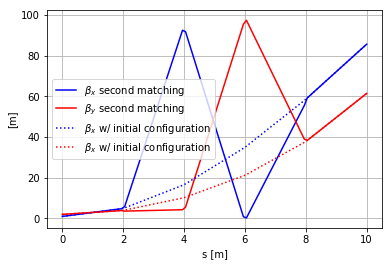

In [24]:
aux=myDFTable3
plt.plot(aux['S'],aux['BETX'],'b', label='$\\beta_x$ second matching')
plt.plot(aux['S'],aux['BETY'],'r', label='$\\beta_y$ second matching')

aux=myDFTable1
plt.plot(aux['S'],aux['BETX'],':b', label='$\\beta_x$ w/ initial configuration')
plt.plot(aux['S'],aux['BETY'],':r', label='$\\beta_x$ w/ initial configuration')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

**Conclusions**: it is very important to observe that the the second matching DOES not find the initial solution (all gradients equal to 0.1 $m^{-2}$). *The solution is NOT unique since the problem is not linear*. In addition the solution that we found via the matching is very sub-optimal: it requires stronger and larger quadrupoles...

In [25]:
# These are the gradients found with the matching
aux=myDFTable3[myDFTable3['KEYWORD']=='QUADRUPOLE']
aux['K1L']/aux['L']

3   -12.576606
5     8.640655
7    -5.887835
9     4.425736
dtype: float64

In [26]:
# These are the gradients that can solve our problem
aux=myDFTable1[myDFTable1['KEYWORD']=='QUADRUPOLE']
aux['K1L']/aux['L']

3    0.1
5    0.1
7    0.1
9    0.1
dtype: float64

### About gradients

In [27]:
aux=myDFTable3[myDFTable3['KEYWORD']=='QUADRUPOLE']
aux=aux['K1L']/aux['L']
aux=aux*10 #this is in A
aux*=2  #this is in T/m
aux*=.04 #this is in T
np.abs(aux) #these magnets are extremely difficult to be built (superconductive)

3    10.061285
5     6.912524
7     4.710268
9     3.540589
dtype: float64

In [28]:
aux=myDFTable1[myDFTable1['KEYWORD']=='QUADRUPOLE']
aux=aux['K1L']/aux['L']
aux=aux*10 #this is in A
aux*=2  #this is in T/m
aux*=.04 #this is in T
np.abs(aux) #these magnets are easy to be built

3    0.08
5    0.08
7    0.08
9    0.08
dtype: float64